In [2]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv("city_day.csv" )
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
column = data.columns
column

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
column_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [7]:
for column in column_fill:
    data[column] = data[column].fillna(data[column].mean())

In [8]:
data['Air_Quality'] = data['AQI_Bucket'].fillna('Moderate')
data.drop('AQI_Bucket',axis=1,inplace =True)

In [9]:
city_AQI = data[['City','AQI']].groupby(['City']).mean().sort_values(['AQI']).reset_index()

In [10]:
pmmean10=data["PM10"].mean()
data["PM10"].fillna(pmmean10,inplace=True)

In [11]:
nhmean3=data["NH3"].mean()
data["NH3"].fillna(nhmean3,inplace=True)
cmeano=data["CO"].mean()
data["CO"].fillna(cmeano,inplace=True)

In [12]:
smeano=data["SO2"].mean()
data["SO2"].fillna(smeano,inplace=True)
omean3=data["O3"].mean()
data["O3"].fillna(omean3,inplace=True)
bmeane=data["Benzene"].mean()
data["Benzene"].fillna(bmeane,inplace=True)
tmeanene=data["Toluene"].mean()
data["Toluene"].fillna(tmeanene,inplace=True)
xmeany=data["Xylene"].mean()
data["Xylene"].fillna(xmeany,inplace=True)
ameani=data["AQI"].mean()
data["AQI"].fillna(ameani,inplace=True)

In [13]:
import matplotlib.pyplot as pt1
%matplotlib inline
import seaborn as sn

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

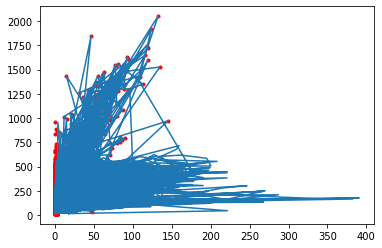

In [14]:
pt1.scatter(data.CO,data.AQI,color='red',marker='.')
pt1.plot(data.NO,data.AQI,)
pt1.plot

In [15]:
x=data.iloc[:,2:13].values
y=data.iloc[:,-2].values

In [16]:
x

array([[6.74505779e+01, 1.18127103e+02, 9.20000000e-01, ...,
        1.33360000e+02, 0.00000000e+00, 2.00000000e-02],
       [6.74505779e+01, 1.18127103e+02, 9.70000000e-01, ...,
        3.40600000e+01, 3.68000000e+00, 5.50000000e+00],
       [6.74505779e+01, 1.18127103e+02, 1.74000000e+01, ...,
        3.07000000e+01, 6.80000000e+00, 1.64000000e+01],
       ...,
       [2.29100000e+01, 6.57300000e+01, 3.45000000e+00, ...,
        3.09600000e+01, 1.00000000e-02, 1.00000000e-02],
       [1.66400000e+01, 4.99700000e+01, 4.05000000e+00, ...,
        2.83000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 6.60000000e+01, 4.00000000e-01, ...,
        1.70500000e+01, 3.28084030e+00, 8.70097208e+00]])

In [17]:
y

array([166.46358149, 166.46358149, 166.46358149, ...,  68.        ,
        54.        ,  50.        ])

Creating the linear regression object

In [18]:
from sklearn import linear_model
model1=linear_model.LinearRegression()
model1.fit(x,y)

LinearRegression()

In [19]:
model1.predict([[67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000]])

array([152.71532406])

Predict the AQI

In [20]:
a=model1.coef_
b=model1.intercept_
y_prediction=a*x+b
y_prediction

array([[81.3682192 , 47.96751693, 15.17641515, ..., 40.97605866,
        15.22503503, 15.22789089],
       [81.3682192 , 47.96751693, 15.17377277, ..., 21.80181866,
        14.46158005, 16.01039588],
       [81.3682192 , 47.96751693, 14.30548507, ..., 21.15302263,
        13.814303  , 17.56683827],
       ...,
       [37.69097077, 33.44408284, 15.04271047, ..., 21.20322708,
        15.22296043, 15.22646296],
       [31.5425021 , 29.0757245 , 15.01100185, ..., 20.68959689,
        15.22503503, 15.22503503],
       [29.93429021, 33.51892146, 15.20389595, ..., 18.51728873,
        14.54438996, 16.4674719 ]])

By using AQI, Visualization is done

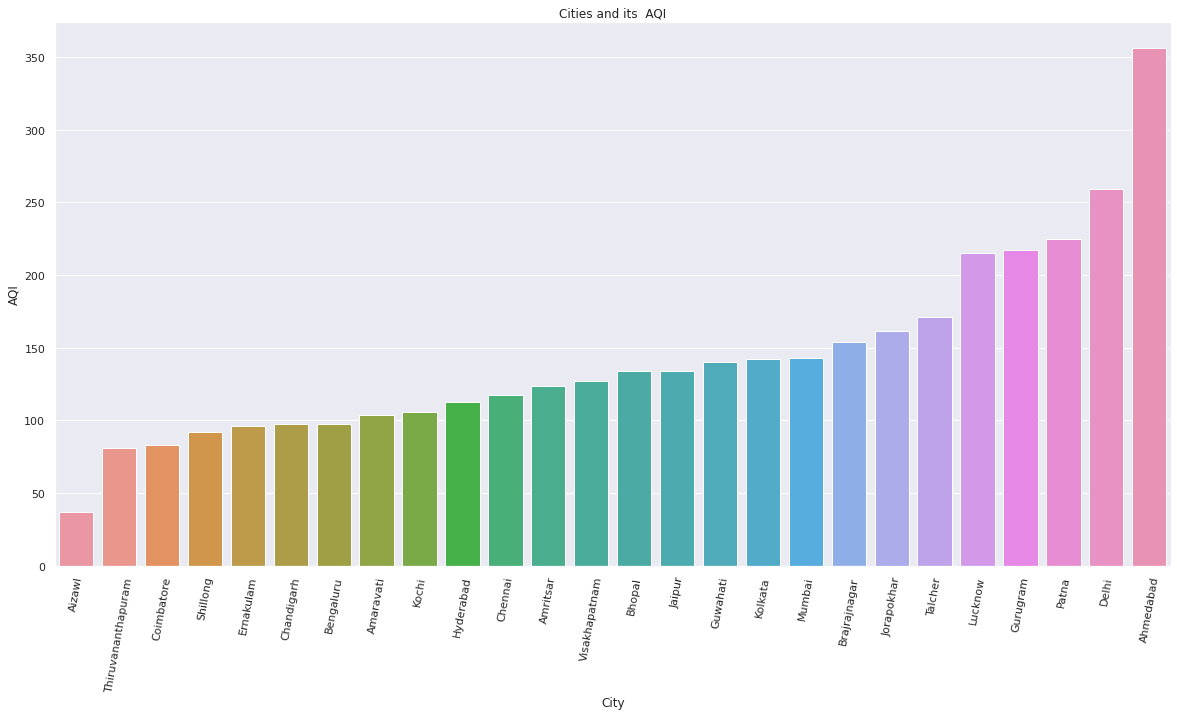

In [21]:
pt1.figure(figsize=(20,10))
sn.set(font_scale=1)
sn.barplot(x='City', y='AQI', data=city_AQI).set(title ='Cities and its  AQI')
color = 'Red'
pt1.xticks(rotation=80)
pt1.show()

In [22]:
most_polluted_cities = data[[ 'City','PM10', 'AQI','PM2.5','NO2']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted_cities

,PM10,AQI,PM2.5,NO2
City,,,,
Ahmedabad,117.409318,356.144807,67.728234,49.805675
Delhi,228.413747,259.024707,117.146631,50.763057
Patna,119.013316,224.822373,113.815353,36.507494
Gurugram,150.467320,217.227975,112.549731,23.797951
Lucknow,118.127103,214.998893,107.568277,33.188450
Talcher,156.552639,171.310522,62.607920,17.343337
Jorapokhar,142.240508,161.707019,66.406088,13.781598
Brajrajnagar,123.094114,154.162373,64.726798,19.524152
Mumbai,110.006396,142.889029,54.864359,27.429689


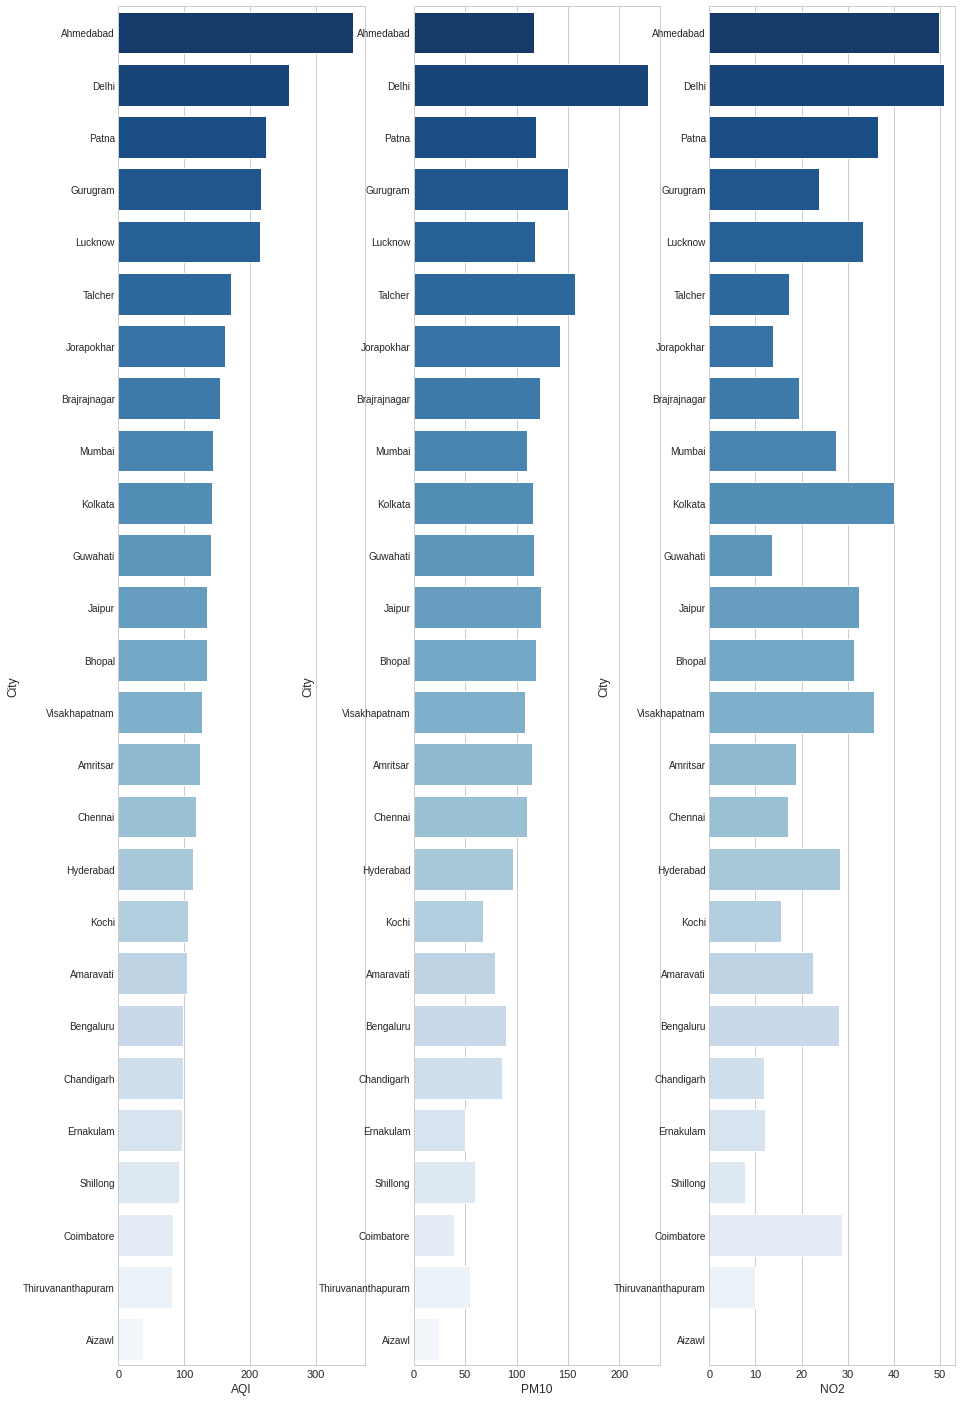

In [23]:
import matplotlib.pyplot as pt1

pt1.style.use('seaborn-whitegrid')
f1, ax_ = pt1.subplots(1, 3, figsize = (15,25))

bar = sn.barplot(x = most_polluted_cities.AQI,y = most_polluted_cities.index,
                   palette = 'Blues_r',
                   ax = ax_[0]);

bar = sn.barplot(x = most_polluted_cities.PM10, y = most_polluted_cities.index,
                   palette = 'Blues_r',
                   ax = ax_[1]);

bar = sn.barplot(x = most_polluted_cities.NO2,y = most_polluted_cities.index,
                   palette = 'Blues_r',
                   ax = ax_[2]);
titles = ['AQI', 'PM10','NO2']
for i in range(3) :
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 10);
  